In [ ]:
!cd sample_data



In [ ]:
!ls

sample_data


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import matplotlib.pyplot as plt
import os
from PIL import Image


import keras
from keras.models import Sequential
from keras.layers import Conv2D,Activation
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import SeparableConv2D
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.callbacks import ModelCheckpoint
from keras import optimizers,regularizers

True

In [ ]:
DATA_DIR = "chest_xray"
TEST_NORMAL = "chest_xray/test/NORMAL"
TRAIN_NORMAL = "chest_xray/train/NORMAL"
VALIDATION_NORMAl = "chest_xray/val/NORMAL"
TEST_PNEUMONIA = "chest_xray/test/PNEUMONIA"
TRAIN_PNEUMONIA = "chest_xray/train/PNEUMONIA"
VALIDATION_NORMAl = "/chest_xray/val/PNEUMONIA"

In [ ]:
import random
rand_normal = random.choice(os.listdir(TRAIN_NORMAL))
rand_pnemonia = random.choice(os.listdir(TRAIN_PNEUMONIA))

nor_im = Image.open(TRAIN_NORMAL + "/"+rand_normal)
pne_im = Image.open(TRAIN_PNEUMONIA + "/"+rand_pnemonia)

a = plt.figure(figsize=(20,10))

a1 = a.add_subplot(1,2,1)
imgplot = plt.imshow(nor_im)
a1.set_title("normal")

a2 = a.add_subplot(1,2,2)
imgplot = plt.imshow(pne_im)
a2.set_title("pneumonia")

FileNotFoundError: ignored

In [ ]:
adama = optimizers.adam(lr=0.001)


In [ ]:
train_gen = ImageDataGenerator(shear_range=0.2,horizontal_flip=True,rescale=1.0/255)

test_gen = ImageDataGenerator(rescale=1.0/255)
train_set = train_gen.flow_from_directory(directory="chest_xray/train",
                                                  target_size = (128,128),
                                                  batch_size = 32,
                                                  class_mode="binary")
test_set = test_gen.flow_from_directory(directory="chest_xray/test",
                                                  target_size = (128,128),
                                                  batch_size = 32,
                                                  class_mode="binary")
val_set = test_gen.flow_from_directory(directory="chest_xray/val",
                                                  target_size = (128,128),
                                                  batch_size = 32,
                                                  class_mode="binary")

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation="relu", input_shape=(128,128,3),name="conv_1.1"))
model.add(Conv2D(32,(3,3),activation="relu",name="conv_1.2"))
model.add(MaxPooling2D((2,2),name="pool_1"))

model.add(SeparableConv2D(64,(3,3),activation="relu",name="conv_2.1"))
model.add(SeparableConv2D(64,(3,3),activation="relu",name="conv_2.2"))
model.add(MaxPooling2D((2,2),name="pool_2"))

model.add(SeparableConv2D(64,(3,3),name="conv_3.1"))
model.add(BatchNormalization(name='bn_3.1'))
model.add(Activation("relu"))
model.add(SeparableConv2D(64,(3,3),activation="relu",name="conv_3.2"))
model.add(MaxPooling2D((2,2),name="pool_3"))

model.add(SeparableConv2D(128,(3,3),name="conv_4.1"))
model.add(BatchNormalization(name='bn_4.1'))
model.add(Activation("relu"))
model.add(SeparableConv2D(128,(3,3),activation="relu",name="conv_4.2"))
model.add(MaxPooling2D((2,2),name="pool_4"))

model.add(Flatten())

model.add(Dense(activation="relu",units=128,
                kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.7,name="Drop_2"))
model.add(Dense(activation="sigmoid",units=1))

model.compile(optimizer=adama,loss = "binary_crossentropy", metrics=["accuracy"])

In [ ]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1.1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
conv_1.2 (Conv2D)            (None, 124, 124, 32)      9248      
_________________________________________________________________
pool_1 (MaxPooling2D)        (None, 62, 62, 32)        0         
_________________________________________________________________
conv_2.1 (SeparableConv2D)   (None, 60, 60, 64)        2400      
_________________________________________________________________
conv_2.2 (SeparableConv2D)   (None, 58, 58, 64)        4736      
_________________________________________________________________
pool_2 (MaxPooling2D)        (None, 29, 29, 64)        0         
_________________________________________________________________
conv_3.1 (SeparableConv2D)   (None, 27, 27, 64)       

In [ ]:
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
xray_model = model.fit_generator(train_set,
                                steps_per_epoch = 163,
                                callbacks=callbacks_list,
                                epochs = 20,
                                validation_data = test_set,
                                validation_steps = 624//32)



Epoch 1/20
163/163 [==============================] - 353s 2s/step - loss: 0.6566 - acc: 0.8313 - val_loss: 0.6349 - val_acc: 0.6990

Epoch 00001: val_acc improved from -inf to 0.69901, saving model to weights.best.hdf5
Epoch 2/20
163/163 [==============================] - 346s 2s/step - loss: 0.2318 - acc: 0.9344 - val_loss: 0.9102 - val_acc: 0.6807

Epoch 00002: val_acc did not improve from 0.69901
Epoch 3/20
163/163 [==============================] - 343s 2s/step - loss: 0.1730 - acc: 0.9540 - val_loss: 1.3148 - val_acc: 0.6571

Epoch 00003: val_acc did not improve from 0.69901
Epoch 4/20
163/163 [==============================] - 345s 2s/step - loss: 0.1633 - acc: 0.9557 - val_loss: 1.2586 - val_acc: 0.6892

Epoch 00004: val_acc did not improve from 0.69901
Epoch 5/20
163/163 [==============================] - 346s 2s/step - loss: 0.1538 - acc: 0.9578 - val_loss: 0.5929 - val_acc: 0.7618

Epoch 00005: val_acc improved from 0.69901 to 0.76182, saving model to weights.best.hdf5
Epo

In [ ]:
model.save('model.h5')


In [ ]:
!ls


chest_xray  chest-xray-pneumonia.zip  model.h5	sample_data  weights.best.hdf5


In [ ]:
test_accu = model.evaluate_generator(test_set,steps=624//32)


In [ ]:
test_accu

[1.4864881383745294, 0.7417763157894737]

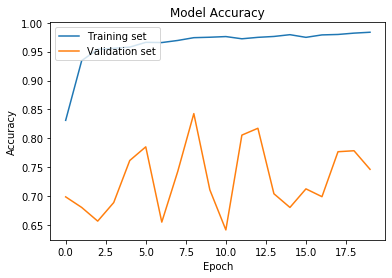

In [ ]:
plt.plot(xray_model.history['acc'])
plt.plot(xray_model.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

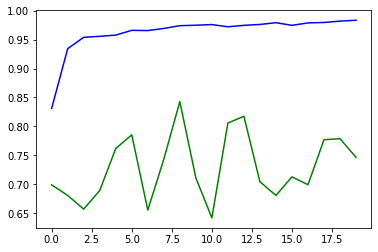

In [ ]:
plt.plot(xray_model.history['val_acc'],c='g')
plt.plot(xray_model.history['acc'],c='b')

In [ ]:
!cd ..
!ls





sample_data


In [ ]:
from google.colab import files
files.download("model.h5")

FileNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')